# Package installation

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/216.3 MB 4.0 MB/s eta 0:00:0000:0100:02
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [46 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pkg_resources/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pkg_resources/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks

In [8]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [46 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pkg_resources/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pkg_resources/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pkg_resources/_vendor/packagin

In [11]:
import tensorflow as tf
import os

2023-08-05 13:15:05.687533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import cv2
import imghdr

# Removing unwanted extensions

In [21]:
data_dir = 'Cars'
correct_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [26]:
for brand in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, brand)):
        image_path = os.path.join(data_dir, brand, image)
        try:
            img = cv2.imread(image_path)
            img_ext = imghdr.what(image_path)
            if img_ext not in correct_ext:
                print(f'Image does not have the correct extension: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(e)
            print(f"Issue with image {image_path}")

libpng warning: iCCP: known incorrect sRGB profile


NotADirectoryError: [Errno 20] Not a directory: 'Cars/.DS_Store'

# Rescaling and splitting the data

In [27]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [48]:
data = tf.keras.utils.image_dataset_from_directory("Cars")
data = data.map(lambda x,y: (x/255, y))

Found 3719 files belonging to 5 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [56]:
batch = data_iterator.next()

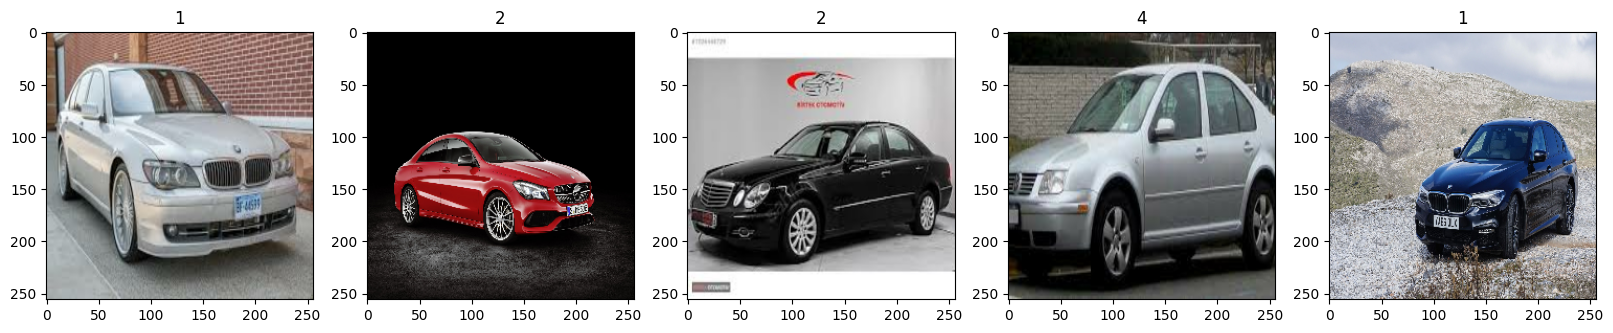

In [57]:
fig,  ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])